In [4]:
# pip install beautifulsoup4 requests lxml

In [40]:
from bs4 import BeautifulSoup
import requests
import difflib, pickle, re

# HTML 가져오기

In [8]:
# HTTP GET Request
headers = {
    "User-agent": "Mozilla/5.0"
}
req = requests.get("https://www.naver.com/", headers=headers)

In [9]:
req.status_code

200

In [17]:
req.ok

True

In [14]:
req.headers

{'Server': 'NWS', 'Date': 'Wed, 02 Jun 2021 19:26:14 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=61c0568932e1a58df84ec3a0c241b8c0fd2093469d31ab8537a5e835384d7804; Expires=Thu, 03 Jun 2021 19:26:14 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}

'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한
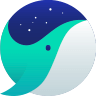
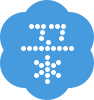

In [15]:
req.text

# HTML Parsing

In [18]:
soup = BeautifulSoup(req.text, "lxml")

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title"/>
  <meta content="index,nofollow" name="robots"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>
  <meta content="네이버" property="og:title"/>
  <meta content="https://www.naver.com/" property="og:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="" name="twitter:title"/>
  <meta content="https://www.naver.com/" name="twitter:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
  <meta content="네이버 메인에서
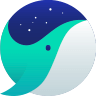
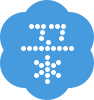

In [20]:
print(soup.prettify())

In [24]:
soup.title.text

'NAVER'

In [53]:
soup.div

<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>

In [48]:
footer = soup.find("div", {"class": "footer_inner"}).text
footer

"                 공지사항  [안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요.\n 서비스 전체보기     Creators 크리에이터 스몰비즈니스   Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록   Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스         웨일 브라우저 다운받기        프로젝트 꽃 바로가기      네이버 정책 및 약관  회사소개 인재채용 제휴제안 이용약관 개인정보처리방침 청소년보호정책 네이버 정책 고객센터  ⓒ NAVER Corp.  "

In [61]:
footer_str = re.sub(r"\s+", " ", footer).strip()
footer_str

"공지사항 [안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요. 서비스 전체보기 Creators 크리에이터 스몰비즈니스 Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록 Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스 웨일 브라우저 다운받기 프로젝트 꽃 바로가기 네이버 정책 및 약관 회사소개 인재채용 제휴제안 이용약관 개인정보처리방침 청소년보호정책 네이버 정책 고객센터 ⓒ NAVER Corp."

In [62]:
monitor_site = {"naver": footer_str}
monitor_site

{'naver': "공지사항 [안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요. 서비스 전체보기 Creators 크리에이터 스몰비즈니스 Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록 Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스 웨일 브라우저 다운받기 프로젝트 꽃 바로가기 네이버 정책 및 약관 회사소개 인재채용 제휴제안 이용약관 개인정보처리방침 청소년보호정책 네이버 정책 고객센터 ⓒ NAVER Corp."}

# 변경 확인

In [65]:
with open("monitor_site.pkl", "wb") as pkl:
    pickle.dump(monitor_site, pkl)

In [66]:
with open("monitor_site.pkl", "rb") as pkl:
    monitor_restore = pickle.load(pkl)

In [67]:
monitor_restore

{'naver': "공지사항 [안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요. 서비스 전체보기 Creators 크리에이터 스몰비즈니스 Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록 Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스 웨일 브라우저 다운받기 프로젝트 꽃 바로가기 네이버 정책 및 약관 회사소개 인재채용 제휴제안 이용약관 개인정보처리방침 청소년보호정책 네이버 정책 고객센터 ⓒ NAVER Corp."}

In [69]:
difflib.SequenceMatcher(None, monitor_site["naver"], monitor_restore["naver"]).ratio()

1.0